# Final Hackathon Project

## Description

Artificial Intelligence is an integral part of all major e-commerce companies today. Today's online retail platforms are heavily powered by algorithms and applications that use AI. Machine learning is used in a variety of ways, from inventory control and quality assurance in the warehouse to product recommendations and sales demographics on the website.

Let’s say you want to create a promotional campaign for an e-commerce store and offer discounts to customers in the hopes that this might increase your sales.

You have been provided descriptions of products on Amazon and Flipkart, including details like product title, ratings, reviews, and actual prices. In this challenge, you will predict discounted prices of the listed products based on their ratings and actual prices. 

## Introduction

Columns

    title - Name of the product
    Rating- average rating given to a product
    maincateg - category that the product is listed under(men/women)
    platform - platform on which it is sold on (Eg. Amazon, Flipkart)
    price1 - Discounted Price of the listed product
    actprice1 - Actual price of the listed product
    Offer % - Discount percent
    norating1 - number of ratings available for a particular product
    noreviews1 - number of reviews available for a particular product
    star_5f - number of five star ratings given to a particular product
    star_4f - number of four star ratings given to a particular product
    star_3f - number of three star ratings given to a particular product
    star_2f - number of two star ratings given to a particular product
    star_1f - number of one star ratings given to a particular product
    fulfilled1- whether it is Amazon fulfilled or not


## imports and renaming

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train.head(5)

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1
5,2692,Women Pink Flats Sandal,4.1,Women,Flipkart,359,499,28.06%,274.0,25.0,153.0,49.0,34.0,15,23,0
6,3236,Women Navy Heels Sandal,4.0,Women,Flipkart,499,999,50.05%,249.0,31.0,130.0,52.0,27.0,9,28,1
7,14633,Women Blue Wedges Sandal,3.9,Women,Flipkart,209,1299,83.91%,121.0,17.0,63.0,25.0,14.0,9,12,0
8,1872,Sneakers For Women (Pink),4.2,Women,Flipkart,549,999,45.05%,191.0,30.0,120.0,25.0,31.0,7,12,1
9,1668,"Men Black, Beige Sandal",4.1,Men,Flipkart,809,899,10.01%,36126.0,5028.0,18688.0,9899.0,3709.0,1272,2558,0


- Renaming the columns name

In [5]:
col = ['id', 'title', 'rating', 'main_category', 'platform', 'final_price', 'actual_price',
       'offer_per', 'norating', 'noreviews', 'five_star', 'four_star', 'three_star',
       'two_star', 'one_star', 'fulfilled']
df_train.columns = col

In [6]:
col = ['id', 'title', 'rating', 'main_category', 'platform', 'actual_price',
       'norating', 'noreviews', 'five_star', 'four_star', 'three_star', 'two_star',
       'one_star', 'fulfilled']
df_test.columns = col

## Cleaning the data

- Removing the % symbol from the offer_per feature and converting it to float

In [7]:
df_train['offer_per'] =df_train.offer_per.apply(lambda x: x.replace('%', '')).astype(float)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15730 non-null  int64  
 1   title          15730 non-null  object 
 2   rating         15730 non-null  float64
 3   main_category  15204 non-null  object 
 4   platform       15730 non-null  object 
 5   final_price    15730 non-null  int64  
 6   actual_price   15730 non-null  int64  
 7   offer_per      15730 non-null  float64
 8   norating       15052 non-null  float64
 9   noreviews      15152 non-null  float64
 10  five_star      15142 non-null  float64
 11  four_star      15191 non-null  float64
 12  three_star     15499 non-null  float64
 13  two_star       15730 non-null  int64  
 14  one_star       15730 non-null  int64  
 15  fulfilled      15730 non-null  int64  
dtypes: float64(7), int64(6), object(3)
memory usage: 1.9+ MB


In [9]:
df_train.isna().sum()

id                 0
title              0
rating             0
main_category    526
platform           0
final_price        0
actual_price       0
offer_per          0
norating         678
noreviews        578
five_star        588
four_star        539
three_star       231
two_star           0
one_star           0
fulfilled          0
dtype: int64

In [10]:
df_test.isna().sum()

id                 0
title              0
rating           203
main_category     67
platform           0
actual_price       0
norating           0
noreviews          0
five_star         68
four_star          0
three_star         0
two_star           0
one_star         186
fulfilled          0
dtype: int64

- Both test and train data have missing values.

### Maincategory

Collecting the Keywords ('Men and Women') from the title 

In [11]:
def get_keword(title):
    if ( "women"  in title.lower() ) or ( "girl"  in title.lower() ): # Checking Women first as Men word is present in Women
        return "Women"
    elif ( "men"  in title.lower() ) or ( "boy"  in title.lower() ):
        return "Men"
    else:  #if Neither Men nor Women is in main_category then returning Other
        return 'Other'

In [12]:
np.unique(np.vectorize(get_keword)(df_train['title']), return_counts=True)

(array(['Men', 'Other', 'Women'], dtype='<U5'), array([5851, 1590, 8289]))

In [13]:
def main_category(cat,title_):
    if pd.notna(cat):
        return cat
    elif pd.isna(cat):  # Replacing the main_category with the keyword only if it is Nan type
        return get_keword(title_)  

In [14]:
np.unique(np.vectorize(main_category)(df_train['main_category'],df_train['title']), return_counts=True)

(array(['Men', 'Other', 'Women'], dtype='<U5'), array([6615,   56, 9059]))

- As we see that after applying this only 56  'nan' main_category will remain left names as 'Other' hence going for this

In [15]:
df_train['main_category'] = np.vectorize(main_category)(df_train['main_category'],df_train['title'])

- Applying the same for test dataset

In [16]:
np.unique(np.vectorize(main_category)(df_test['main_category'],df_test['title']), return_counts=True)

(array(['Men', 'Other', 'Women'], dtype='<U5'), array([2169,    7, 3068]))

In [17]:
df_test['main_category'] = np.vectorize(main_category)(df_test['main_category'],df_test['title'])

(0.0, 60.0)

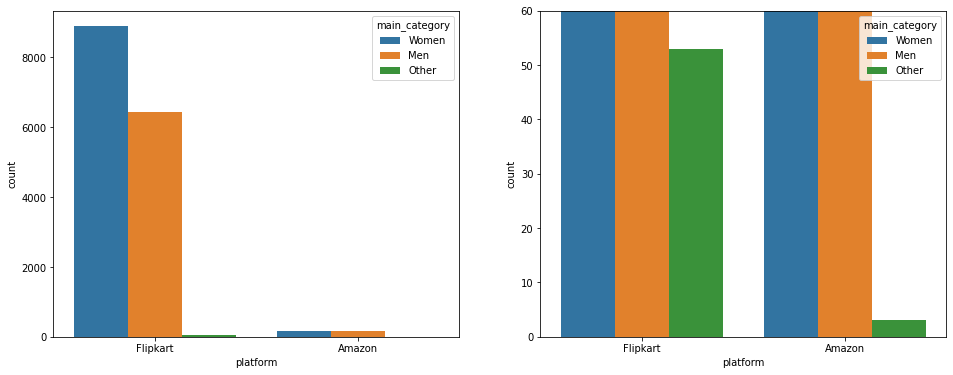

In [18]:
fig, ax = plt.subplots(figsize=(16,6), ncols=2)
sns.countplot(x='platform', data=df_train,hue='main_category', ax=ax[0])
sns.countplot(x='platform', data=df_train,hue='main_category', ax=ax[1])
plt.ylim(0,60)

- Found That very few products are sold on Amazon

<AxesSubplot:xlabel='main_category', ylabel='offer_per'>

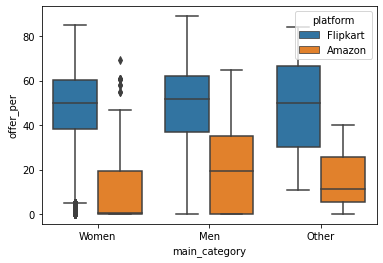

In [19]:
sns.boxplot(x='main_category', y='offer_per', data=df_train,hue='platform')

- No pattern is found in the above analysis,
let's see if we can find anything in the data

- Found that there are few keywords used in the title of the products

In [20]:
df_train[df_train.apply(lambda x:True if 'Slides' in x['title'] else False, axis=1)]['main_category'].value_counts()

Men      330
Women    248
Other     17
Name: main_category, dtype: int64

In [21]:
df_train[df_train.apply(lambda x:True if 'Slippers' in x['title'] else False, axis=1)]['main_category'].value_counts()

Women    355
Men      266
Other     18
Name: main_category, dtype: int64

In [22]:
df_train[df_train.apply(lambda x:True if 'Flip Flop' in x['title'] else False, axis=1)]['main_category'].value_counts()

Women    436
Men      410
Other     18
Name: main_category, dtype: int64

In [23]:
df_train[df_train.apply(lambda x:True if 'Gliders' in x['title'] else False, axis=1)]['main_category'].value_counts()

Women    3
Other    1
Name: main_category, dtype: int64

- from above we can fill the main_category by the mode of the main_category in the train dataset on the basis of the keywords in the title like ('Slippers' , 'Slides' , 'Flip Flop')

In [24]:
def find_mode(word):
    return df_train[df_train.apply(lambda x:True if word in x['title'] else False, axis=1)]['main_category'].mode()[0]

def replace_by_other_keywords(cat, title):
    if cat == "Other":
        
        if 'Slippers' in title:
            return find_mode('Slippers')
        elif 'Flip Flop' in title:
            return find_mode('Flip Flop')
        elif 'Gliders' in title:
            return find_mode('Gliders')
        elif 'Slides' in title:
            return find_mode('Slides')
        else:
            return cat
    else:
        return cat

In [25]:
df_train['main_category'] = np.vectorize(replace_by_other_keywords)(df_train['main_category'],df_train['title'])

In [26]:
df_train['main_category'].value_counts()

Women    9096
Men      6632
Other       2
Name: main_category, dtype: int64

In [27]:
df_test['main_category'] = np.vectorize(replace_by_other_keywords)(df_test['main_category'],df_test['title'])

In [28]:
df_test['main_category'].value_counts()

Women    3073
Men      2171
Name: main_category, dtype: int64

- As of now we hve filled almost all the missing values in the main_category column , except 2 left in trainingset, let's see them in detail

In [29]:
df_train[df_train['main_category'] == 'Other']

,id,title,rating,main_category,platform,final_price,actual_price,offer_per,norating,noreviews,five_star,four_star,three_star,two_star,one_star,fulfilled
5885,17515,crocs Unisex's Classic Clogs,4.3,Other,Amazon,1494,2495,40.12,NaN,NaN,NaN,NaN,NaN,23,62,0
10461,9108,"ASIAN Captain-12 Latest Casual Sneakers,Lace u...",3.7,Other,Amazon,599,674,11.13,NaN,NaN,NaN,NaN,12.0,34,32,1


- As both of them are likely to be a Unisex Product and most of the values are missing in both of them , we don't have any such product in Test dataset, hence Dopping them

In [30]:
df_train = df_train.drop(index=[5885,10461])

- Hence it's done with the main_category column let's move to another column

### one_star / two_star / three_star / four_star / five_star

- Rows where all the stars values are zero but rating and no. of rating is non zero

In [31]:
df_train[(df_train['five_star']==0) & (df_train['four_star']==0) & (df_train['three_star']==0) & (df_train['two_star']==0) & (df_train['one_star']==0)].head(2)

,id,title,rating,main_category,platform,final_price,actual_price,offer_per,norating,noreviews,five_star,four_star,three_star,two_star,one_star,fulfilled
1197,1099,DOCTOR EXTRA SOFT Ortho Care Diabetic Orthopae...,4.0,Men,Flipkart,499,799,37.55,3046.0,425.0,0.0,0.0,0.0,0,0,1
1413,12126,Jutis For Men (Tan),4.3,Men,Flipkart,1530,1699,9.95,22.0,5.0,0.0,0.0,0.0,0,0,0


In [32]:
df_test[(df_test['five_star']==0) & (df_test['four_star']==0) & (df_test['three_star']==0) & (df_test['two_star']==0) & (df_test['one_star']==0)].head(2)

,id,title,rating,main_category,platform,actual_price,norating,noreviews,five_star,four_star,three_star,two_star,one_star,fulfilled
161,11131,Stylish and Comfortable Shoes For Man | Casual...,4.2,Men,Flipkart,999,416,56,0.0,0,0,0,0.0,0
165,14464,Slip On For Men (Black),4.3,Men,Flipkart,799,382,55,0.0,0,0,0,0.0,0


In [33]:
df_test[(df_test['five_star']!=0) & (df_test['four_star']!=0) & (df_test['three_star']!=0) & (df_test['two_star']!=0) & (df_test['one_star']!=0) & (df_test['rating'] > 2.5)].describe()

,id,rating,actual_price,norating,noreviews,five_star,four_star,three_star,two_star,one_star,fulfilled
count,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4374.000000,4391.000000,4391.000000,4391.000000,4357.000000,4391.000000
mean,10438.913459,3.995058,1300.737190,3382.058529,469.059895,1762.908779,723.884992,404.123434,175.257117,311.663759,0.629242
std,6006.102257,0.232890,1145.278016,13223.281129,1952.454435,6739.075068,3052.302524,1685.641259,632.006441,1109.351599,0.483063
min,0.000000,2.800000,162.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5212.500000,3.900000,699.000000,122.500000,17.000000,60.000000,24.000000,13.000000,7.000000,11.000000,0.000000
50%,10518.000000,4.000000,999.000000,430.000000,59.000000,220.000000,87.000000,49.000000,22.000000,41.000000,1.000000
75%,15582.500000,4.200000,1299.000000,1938.000000,276.500000,1011.750000,397.500000,217.500000,97.000000,167.000000,1.000000
max,20964.000000,5.000000,10999.000000,289973.000000,45448.000000,151193.000000,74037.000000,49924.000000,12629.000000,23139.000000,1.000000


- There are many rows in which rating and no. of rating are given but all the stars value are missing, hence we will fill the missing values with the 1/2 as five star , 1/4.5 as four star , 1/8 as three star , 1/19 as two star , 1/11 as one star 
- These ratios are calculated using the formula : (no. of ratings given)/(no. of ratings available) for those rows in which each 7 features were available and were having rating greater than 2.5 as above data have the same condition

In [34]:
def fill_all_missing_star(row):
    if (( row['one_star'] ==0) & ( row['two_star'] ==0) & ( row['three_star'] ==0) & ( row['four_star'] ==0) & ( row['five_star'] ==0) & ( math.isnan(row['rating']) == False)):
        row['one_star'] = math.ceil(row['norating']/11)
        row['two_star'] = math.ceil(row['norating']/20)
        row['three_star'] = math.ceil(row['norating']/8)
        row['four_star'] = math.ceil(row['norating']/4.6)
        row['five_star'] = math.ceil(row['norating']/2)
        return row
    else:
        return row

In [35]:
df_train = df_train.apply(lambda x: fill_all_missing_star(x), axis=1)

In [36]:
df_test = df_test.apply(lambda x: fill_all_missing_star(x), axis=1)

- Now analysing rest of missing stars values in the dataset

In [37]:
df_train[['rating','norating','five_star','four_star','three_star','two_star','one_star']].isna().sum()

rating          0
norating      676
five_star     586
four_star     537
three_star    230
two_star        0
one_star        0
dtype: int64

In [38]:
df_test[['rating','norating','five_star','four_star','three_star','two_star','one_star']].isna().sum()

rating        203
norating        0
five_star      68
four_star       0
three_star      0
two_star        0
one_star      186
dtype: int64

- We know that norating is the sum of one_star, two_star, three_star, four_star, five_star
- Hence calculating those star values in which any one of the star has missing values provided that norating is not zero

In [39]:
import math

In [40]:
def fill_single_star(df):
    if not math.isnan(df['norating']):
        stars = ['one_star','two_star','three_star','four_star','five_star']
        for i in range(len(stars)):
            if pd.isna(df[stars[i%5]]) & pd.notna(df[stars[(i+1)%5]]) & pd.notna(df[stars[(i+2)%5]]) & pd.notna(df[stars[(i+3)%5]]) & pd.notna(df[stars[(i+4)%5]]):
                sum = df[stars[(i+1)%5]] + df[stars[(i+2)%5]] + df[stars[(i+3)%5]] + df[stars[(i+4)%5]]
                df[stars[i%5]] = df['norating'] - sum
        return df
    else:
        return df

In [41]:
df_train = df_train.apply(lambda x: fill_single_star(x), axis=1)

In [42]:
df_train[['rating','norating','five_star','four_star','three_star','two_star','one_star']].isna().sum()

rating          0
norating      676
five_star     567
four_star     526
three_star    225
two_star        0
one_star        0
dtype: int64

In [43]:
df_test = df_test.apply(lambda x: fill_single_star(x), axis=1)

In [44]:
df_test[['rating','norating','five_star','four_star','three_star','two_star','one_star']].isna().sum()

rating        203
norating        0
five_star      45
four_star       0
three_star      0
two_star        0
one_star       45
dtype: int64

- Now considering those rows where norating and rating both are not null and two of the stars are null
- In this case we have two equation and two variable , hence we can solve that equation and find the stars value

In [45]:
def fill_double_star(df):
    if (not math.isnan(df['norating'])) & (not math.isnan(df['rating'])):
        stars = ['one_star','two_star','three_star','four_star','five_star']
        value = {'one_star':1,'two_star':2,'three_star':3,'four_star':4,'five_star':5}
        for i in range(len(stars) - 1):
            for j in range(i+1, len(stars)):
                if pd.isna(df[stars[i%5]]) & pd.isna(df[stars[(j)%5]]) & pd.notna(df[stars[(j+1)%5]]) & pd.notna(df[stars[(j+2)%5]]) & pd.notna(df[stars[(j+3)%5]]):
                    sum = df[stars[(j+1)%5]] + df[stars[(j+2)%5]] + df[stars[(j+3)%5]]
                    weighted_sum = value[stars[(j+1)%5]]*df[stars[(j+1)%5]] +  value[stars[(j+2)%5]]*df[stars[(j+2)%5]] +  value[stars[(j+3)%5]]*df[stars[(j+3)%5]]
                    
                    
                    left_sum = df['norating'] - sum                     #             df[stars[i%5]] +             df[stars[j%5]] = left_sum 
                    left_weighted_sum = df['norating']*df['rating'] - weighted_sum   # ( (i+1)%5 )*df[stars[i%5]] + ( (j+1)%5 )*df[stars[j%5]] = left_weighted_sum


                    df[stars[i%5]] = (-( (j+1)%6 )*left_sum + left_weighted_sum  )/ ( (i-j) )
                    df[stars[j%5]] = (-( (i+1)%6 )*left_sum + left_weighted_sum  )/ ( (j-i) )
        return df
    else:
        return df

In [46]:
df_train = df_train.apply(lambda x: fill_double_star(x), axis=1)

In [47]:
df_train[['rating','norating','five_star','four_star','three_star','two_star','one_star']].isna().sum()

rating          0
norating      676
five_star     531
four_star     482
three_star    217
two_star        0
one_star        0
dtype: int64

In [48]:
df_test = df_test.apply(lambda x: fill_double_star(x), axis=1)

In [49]:
df_test[['rating','norating','five_star','four_star','three_star','two_star','one_star']].isna().sum()

rating        203
norating        0
five_star      45
four_star       0
three_star      0
two_star        0
one_star       45
dtype: int64

- By this way we got very less values filled by this technique, let's see if we can do anything else

In [50]:
df_train[df_train['four_star'] < 0]

,id,title,rating,main_category,platform,final_price,actual_price,offer_per,norating,noreviews,five_star,four_star,three_star,two_star,one_star,fulfilled
11786,19678,Fila Men's Crante Sneakers,3.8,Men,Amazon,781,1706,54.22,41.0,NaN,188.8,-227.8,11.0,21,48,1


In [51]:
df_test[df_test['one_star'] < 0]

,id,title,rating,main_category,platform,actual_price,norating,noreviews,five_star,four_star,three_star,two_star,one_star,fulfilled
1045,906,1402 Slip On For Men (Brown),NaN,Men,Flipkart,2628,10,1,7.0,3,2,3,-5.0,0
1707,227,Women SL-123 Magenta Baby Pink Walking Shoes F...,NaN,Women,Flipkart,934,9003,1322,10980.0,2344,940,261,-5522.0,1
1811,244,Slides,NaN,Women,Flipkart,477,258,37,256.0,69,26,8,-101.0,0
2251,522,Women Black Wedges Sandal,4.0,Women,Flipkart,957,679,102,292.0,325,102,56,-96.0,0


- From Above we got to know that there are few values where star value is negative but this is not possible, hence we can make these values as positive
- There were few cases in both training and test data where the sum of the star values is greater than norating, hence following the same trend we are going to make these negative star values as positive

In [52]:
star_col = ['one_star','two_star','three_star','four_star','five_star']
df_train[star_col] = df_train[star_col].abs()
df_test[star_col] = df_test[star_col].abs()

- Let's fill the remaining missing values for the star with the gradual increasing value of the star, as one_star =0 , two_star = 2*one_star , three_star = 3*one_star + 2*two_star and so on

In [53]:
def fill_rest_star(df):
    if pd.isna(df['one_star']):
        df['one_star'] = 0
    if pd.isna(df['two_star']):
        df['two_star'] = 2*df['one_star']
    if pd.isna(df['three_star']):
        df['three_star'] = 3*df['one_star'] + 2*df['two_star']
    if pd.isna(df['four_star']):
        df['four_star'] = 4*df['one_star'] + 3*df['two_star'] + 2*df['three_star']
    if pd.isna(df['five_star']):
        df['five_star'] = 5*df['one_star'] + 4*df['two_star'] + 3*df['three_star'] + 2*df['four_star']
    return df

In [54]:
df_train = df_train.apply(lambda x: fill_rest_star(x), axis=1)

In [55]:
df_test = df_test.apply(lambda x: fill_rest_star(x), axis=1)

In [56]:
df_train.isna().sum()

id                 0
title              0
rating             0
main_category      0
platform           0
final_price        0
actual_price       0
offer_per          0
norating         676
noreviews        576
five_star          0
four_star          0
three_star         0
two_star           0
one_star           0
fulfilled          0
dtype: int64

In [57]:
df_test.isna().sum()

id                 0
title              0
rating           203
main_category      0
platform           0
actual_price       0
norating           0
noreviews          0
five_star          0
four_star          0
three_star         0
two_star           0
one_star           0
fulfilled          0
dtype: int64

- Hence we have filled all the values of the stars, let's move to the next column

### norating

- There are some rows where all the stars values are zero and at the same time no. of rating is also zero , but rating is not zero as this is only present in train data , we can think that this could be a mistake in the rating or no. of rating and all the stars columns
- We can't guess this hence we are dropping these rows

In [58]:
ind = df_train[(df_train['five_star']==0) & (df_train['four_star']==0) & (df_train['three_star']==0) & (df_train['two_star']==0) & (df_train['one_star']==0)].index
df_train[(df_train['five_star']==0) & (df_train['four_star']==0) & (df_train['three_star']==0) & (df_train['two_star']==0) & (df_train['one_star']==0)]

,id,title,rating,main_category,platform,final_price,actual_price,offer_per,norating,noreviews,five_star,four_star,three_star,two_star,one_star,fulfilled
2519,7417,Hush Berry Mens Loafer for Mens Casuals For Me...,3.9,Men,Flipkart,569,1249,54.44,NaN,155.0,0.0,0.0,0.0,0,0,1
2947,2693,Slippers,4.8,Women,Flipkart,695,799,13.02,NaN,1.0,0.0,0.0,0.0,0,0,1
4180,17828,Bellies For Women (Black),4.5,Women,Flipkart,549,999,45.05,NaN,NaN,0.0,0.0,0.0,0,0,0
4461,7891,Drift Cat 5 Core Sneakers For Women (White),5.0,Women,Flipkart,5998,5999,0.02,NaN,NaN,0.0,0.0,0.0,0,0,1
6662,17039,Boots For Women (Brown),4.3,Women,Flipkart,365,999,63.46,NaN,NaN,0.0,0.0,0.0,0,0,0
7180,8536,Flip Flops,4.3,Women,Flipkart,629,899,30.03,NaN,NaN,0.0,0.0,0.0,0,0,1
7398,20083,"Latest Collection, Comfortable & Fashionable B...",3.9,Women,Flipkart,449,999,55.06,NaN,37.0,0.0,0.0,0.0,0,0,0
8367,13656,Boots For Women (Tan),4.7,Women,Flipkart,1899,5599,66.08,NaN,NaN,0.0,0.0,0.0,0,0,0
8723,5924,Wedding Wear Ethnic Wear Party Wear Punjabi Bl...,4.5,Men,Flipkart,499,999,50.05,NaN,NaN,0.0,0.0,0.0,0,0,0
9976,3633,Fire run IDP Running Shoes For Women (Pink),4.4,Women,Flipkart,2998,2999,0.03,NaN,0.0,0.0,0.0,0.0,0,0,1


In [59]:
df_test[(df_test['five_star']==0) & (df_test['four_star']==0) & (df_test['three_star']==0) & (df_test['two_star']==0) & (df_test['one_star']==0)]

,id,title,rating,main_category,platform,actual_price,norating,noreviews,five_star,four_star,three_star,two_star,one_star,fulfilled


In [60]:
df_train.drop(ind, inplace=True)

- As we have filled all the stars values, we can fill the norating values with the sum of the stars values

In [61]:
df_train['norating'] = df_train['one_star'] + df_train['two_star'] + df_train['three_star'] + df_train['four_star'] + df_train['five_star']

In [62]:
df_train.isna().sum()

id                 0
title              0
rating             0
main_category      0
platform           0
final_price        0
actual_price       0
offer_per          0
norating           0
noreviews        568
five_star          0
four_star          0
three_star         0
two_star           0
one_star           0
fulfilled          0
dtype: int64

In [63]:
df_train[df_train['norating'] == 0]

,id,title,rating,main_category,platform,final_price,actual_price,offer_per,norating,noreviews,five_star,four_star,three_star,two_star,one_star,fulfilled


In [64]:
df_test[df_test['norating'] == 0]

,id,title,rating,main_category,platform,actual_price,norating,noreviews,five_star,four_star,three_star,two_star,one_star,fulfilled


### noreviews

In [65]:
df_train.describe()[['norating','noreviews']]

,norating,noreviews
count,15716.000000,15148.000000
mean,3375.126597,424.075522
std,14320.472675,1768.453002
min,1.000000,0.000000
25%,70.750000,9.000000
50%,314.000000,44.000000
75%,1625.000000,215.000000
max,699170.000000,45448.000000


- As we know that noreviews are usually lesser than norating, so we can fill the noreviews with the 1/7th of the norating, as this is the relation between their median

In [66]:
def fill_noreviews(df):
    if pd.isna(df['noreviews']):
        df['noreviews'] = df['norating']/7
    return df

In [67]:
df_train =df_train.apply(lambda x: fill_noreviews(x), axis=1)

### rating

- We can fill the rating with the weighted average of the stars values

In [68]:
def fill_rating(df):
    if pd.isna(df['rating']):
        df['rating'] = ( df['one_star'] + 2*df['two_star'] + 3*df['three_star'] + 4*df['four_star'] + 5*df['five_star'] ) / df['norating']
    return df

In [69]:
df_test = df_test.apply(lambda x: fill_rating(x), axis=1)

- saving the result

In [70]:
df_train.to_csv('data/train_filled.csv', index=False)
df_test.to_csv('data/test_filled.csv', index=False)